In [1]:
from lidar_control import lidar_control
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
import json


Setting up Environment
frame 0/1 -------->
entering capture loop using pipe <pyrealsense2.pyrealsense2.pipeline object at 0x000001E43E0D0458>
gathering datasets for [(stream.depth, 1024, 768, format.z16, 30), (stream.color, 1920, 1080, format.rgb8, 30), (stream.infrared, 1024, 768, format.y8, 30)]
[<pyrealsense2.frame Z16 #2>, <pyrealsense2.frame RGB8 #39>, <pyrealsense2.frame Y8 #2>]
depth frame index is 0
adding colorized depth frame cdepth
Intel_RealSense_L515/00000000f0220140/lidar_002694454.670000_0000000002.npz: 107285 points
4
(2, 2)
metadata: {'frame_counter': 2, 'frame_timestamp': 2694454670, 'time_of_arrival': 1595956506934, 'backend_timestamp': 1595956506890, 'frame_laser_power': 100, 'frame_laser_power_mode': 0, 'raw_frame_size': 1572864}


<Figure size 432x288 with 0 Axes>

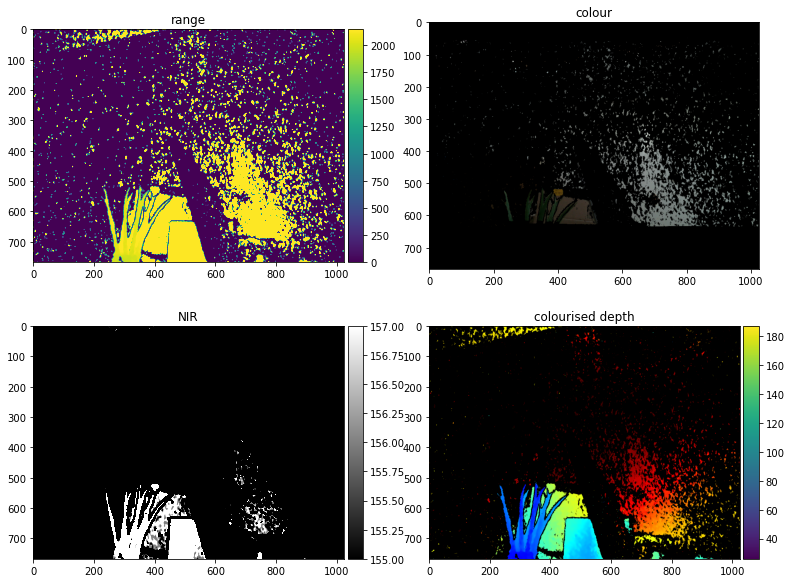

In [2]:
self = lidar_control(verbose=False)
self.load_settings('short_range_settings.json')
self.init(stop=False)
self.click(verbose=True,save=True,nframes=1)
self.plot_frames()
print('metadata:',self.active_devices[0]['camera']['meta'])

In [27]:
from pathlib import Path
from glob import glob
import numpy as np
import pylab as plt

files = glob(Path('Intel_RealSense_L515','00000000f0220140','*.npz').as_posix())

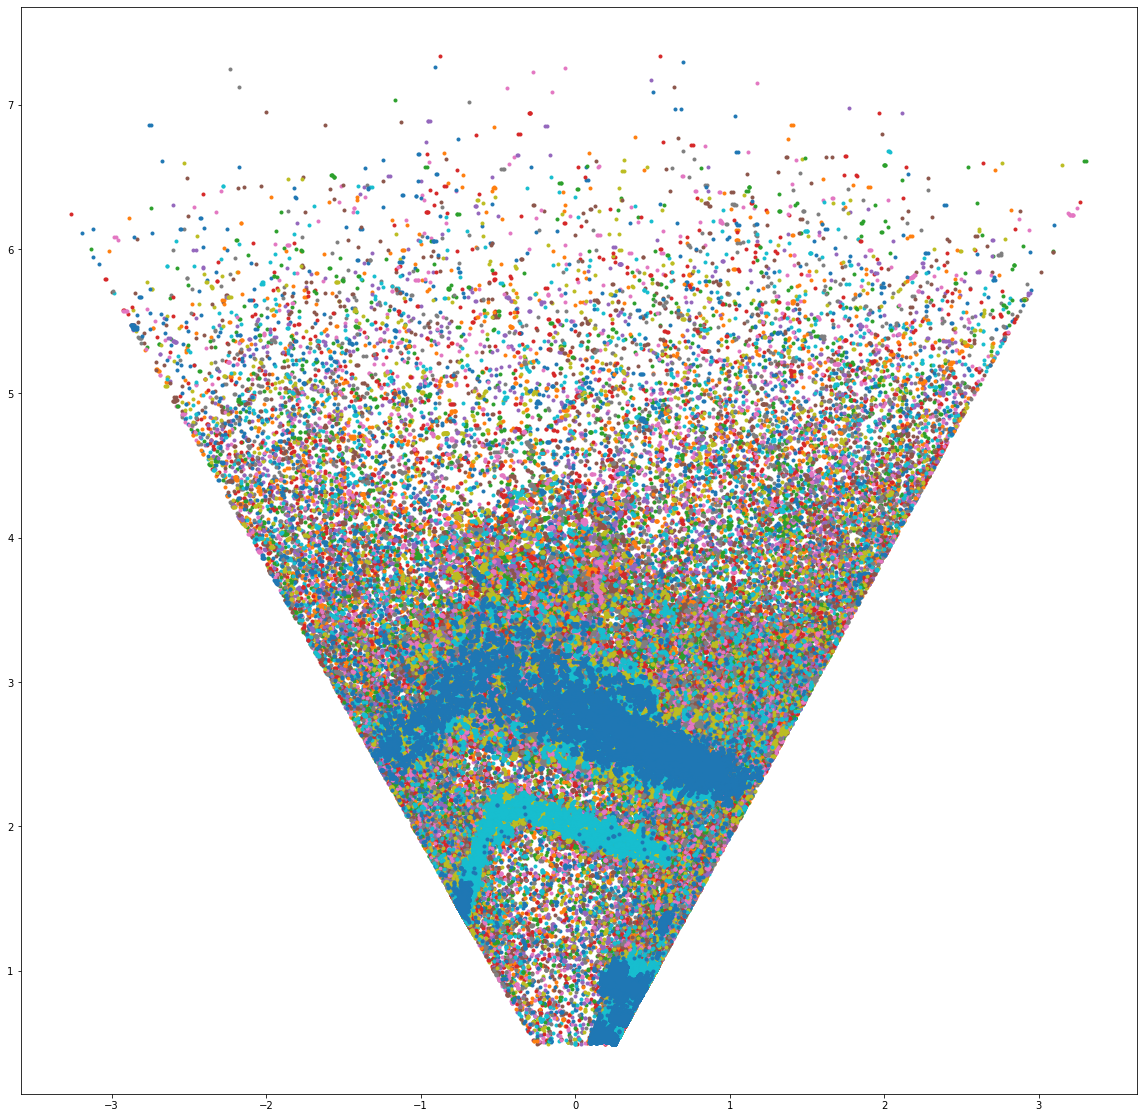

In [33]:
plt.figure(figsize=(20,20))
for f in files:
    l = np.load(f)
    plt.plot(l['verts'][:,1],l['verts'][:,2],'.')
    

In [5]:
device = self.active_devices[0]

camera =  device['camera']
bands  =  camera['bands']
nd, nc, nn, ncd = bands.index('depth'), bands.index('color'), \
                  bands.index('nir'),   bands.index('cdepth')

depth,color,nir,cdepth         = [device['datasets'][i] for i in (nd, nc, nn, ncd)]
depth_intrin,color_intrin,\
    nir_intrin,cdepth_intrin   = [camera['intrinsics'][i] for i in (nd, nc, nn, ncd)]

depth_to_color_extrin = depth.profile.get_extrinsics_to(color.profile)
depth_scale = camera['depth_scale']
depth_sensor = device['camera']['sensors'][nd]

In [6]:
# Map depth to color
depth_pixel = [240, 320]   # Random pixel
depth_point = rs.rs2_deproject_pixel_to_point(depth_intrin, depth_pixel, depth_scale)
color_point = rs.rs2_transform_point_to_point(depth_to_color_extrin, depth_point)
color_pixel = rs.rs2_project_point_to_pixel(color_intrin, color_point)
depth_point,color_point,color_pixel

([-4.977581920684315e-05, 4.247762990416959e-05, 0.0002500000118743628],
 [-4.977581920684315e-05, 4.247762990416959e-05, 0.0002500000118743628],
 [240.0, 320.0])

In [9]:
p=device['pipe']

In [12]:
help(p.wait_for_frames)

Help on method wait_for_frames in module pyrealsense2.pyrealsense2:

wait_for_frames(...) method of pyrealsense2.pyrealsense2.pipeline instance
    wait_for_frames(self: pyrealsense2.pyrealsense2.pipeline, timeout_ms: int=5000) -> pyrealsense2.pyrealsense2.composite_frame
    
    Wait until a new set of frames becomes available.
    The frames set includes time-synchronized frames of each enabled stream in the pipeline.
    In case of different frame rates of the streams, the frames set include a matching frame of the slow stream, which may have been included in previous frames set.
    The method blocks the calling thread, and fetches the latest unread frames set.
    Device frames, which were produced while the function wasn't called, are dropped. To avoid frame drops, this method should be called as fast as the device frame rate.
    The application can maintain the frames handles to defer processing. However, if the application maintains too long history, the device may lack memor

In [ ]:
import numpy as np
import pylab as plt
from pathlib import Path
plt.figure(figsize=(20,20))
for ff in ofiles:
    for f in ff:
        data = np.load(f)
        plt.plot(data['verts'][:,0],data['verts'][:,1],'.')

In [ ]:
from pathlib import Path
Path('.').as_posix()

In [ ]:
device['device_info']

In [ ]:
import numpy as np
image = device['datasets'][device['camera']['bands'] == 'color']
depth = device['datasets'][device['camera']['bands'] == 'depth']
pc = rs.pointcloud()
pc.map_to(image)
points = pc.calculate(depth)

In [ ]:
pp=points.get_vertices()
pt=points.get_texture_coordinates()
npp=np.asanyarray(pp)
npt=np.asanyarray(pt)
print(npp.shape,npt.shape)

In [ ]:
rs.camera_info.

In [ ]:
pd = points.get_data()
npd=np.asanyarray(pd)
print(npd.shape)

In [ ]:
x = np.array([np.array([float(m) for m in n]) for n in npt]).astype(float)
    

In [ ]:
import pylab as plt
plt.plot(x[:,0],x[:,1],'.')

In [ ]:
for m in rs.camera_info.__members__:
    rs.camera_info.__getattr__[m]

In [ ]:
self = l
def get_sensor_info(dev):
        camera_info = {}
        for k in rs.camera_info.__members__.keys():
            try:
                camera_info[k] = dev.get_info(rs.camera_info.__members__[k])
            except:
                pass
        return(camera_info)
l.get_sensor_info = get_sensor_info

In [ ]:
self.dev = self.context.query_devices()
pipelines = []
dev_infos = []
pipeline_profiles = []
for d in self.dev:
            pipe = rs.pipeline(self.context)
            dev_info = self.get_sensor_info(d)
            self.config.enable_device(dev_info['serial_number'])
            pipeline_profile = self.start(pipeline=pipe,config=self.config)
            if (self.verbose)
                print(f'started {dev_info["name"]} S/N: {dev_info["serial_number"]}')
            # store in list
            pipelines.append(pipe)
            dev_infos.append(dev_info)
            pipeline_profiles.append(pipeline_profile)
            
for d in self.dev:
            
            self.stop(pipeline=pipe)
            print(f'stopped {dev_info["name"]} S/N: {dev_info["serial_number"]}')

In [ ]:
camera = l.read_from_camera()

camera['pc'] = l.get_pointcloud(camera['depth'],\
                      camera['color'],\
                      pc_file='points.ply')

frames = [camera['depth'],camera['nir'],camera['color'],camera['colorized_depth']]
l.plot(frames,dummy=True,file='result.png')



In [ ]:
rs.camera_info.name

In [ ]:
help(rs_dev.get_info)

In [ ]:
rs2::config config;             
         rs2::pipeline_profile pipeline_profile = pipeline.start(config); // camera starts capturing
         pipeline_profile = pipeline.start(config);
         rs2::device rs_dev = pipeline_profile.get_device();
         std::cout <<"Device Name"<<": "<< rs_dev.get_info(RS2_CAMERA_INFO_NAME)<<std::endl;
         std::cout <<"Firmware Version"<<": "<<rs_dev.get_info(RS2_CAMERA_INFO_FIRMWARE_VERSION)<<std::endl;
         std::cout <<"Serial Number"<<": "<<rs_dev.get_info(RS2_CAMERA_INFO_SERIAL_NUMBER)<<std::endl;
         std::cout <<"Product Id"<<": "<<rs_dev.get_info(RS2_CAMERA_INFO_PRODUCT_ID)<<std::endl;
         pipeline.stop(); // camera stops capturing     
         ----   
            

In [ ]:
q = rs.context.query_devices
p = rs.pipeline(q)

In [ ]:
conf = rs.config()
help(conf)

In [ ]:
# from pyglet_pointcloud_viewer.py
# Processing blocks
def convert_fmt(fmt):
    """rs.format to pyglet format string"""
    return {
        rs.format.rgb8: 'RGB',
        rs.format.bgr8: 'BGR',
        rs.format.rgba8: 'RGBA',
        rs.format.bgra8: 'BGRA',
        rs.format.y8: 'L',
    }[fmt]



def read_from_camera(decimate_scale=0,postprocessing=False,color=False):
    #start the frames pipe
    p = rs.pipeline()
    conf = rs.config()
    conf.enable_stream(rs.stream.depth, 1024, 768, rs.format.z16, 30)
    other_nir_stream, other_nir_format = rs.stream.infrared, rs.format.y8
    other_stream, other_format = rs.stream.color, rs.format.rgb8
    conf.enable_stream(other_stream, 1920, 1080, other_format, 30)
    conf.enable_stream(other_nir_stream, 1024, 768, other_nir_format, 30)
    conf.enable_stream(rs.stream.accel,rs.format.motion_xyz32f,200)
    conf.enable_stream(rs.stream.gyro,rs.format.motion_xyz32f,200)
    
    try:
        prof = p.start(conf)
    except:
        print('failed to start connection to device')
        return None,None,None
    
    profile = p.get_active_profile()
    depth_sensor = profile.get_device().first_depth_sensor()
    depth_scale = depth_sensor.get_depth_scale()
    depth_profile = rs.video_stream_profile(profile.get_stream(rs.stream.depth))
    depth_intrinsics = depth_profile.get_intrinsics()
    w, h = depth_intrinsics.width, depth_intrinsics.height
    # from pyglet_pointcloud_viewer.py
    # Processing blocks
    pc = rs.pointcloud()
    if decimate_scale > 0:
        decimate = rs.decimation_filter()
        decimate.set_option(rs.option.filter_magnitude, int(2 ** decimate_level))
        
    colorizer = rs.colorizer()
    
    vertex_list = pyglet.graphics.vertex_list(
    w * h, 'v3f/stream', 't2f/stream', 'n3f/stream')
    
    if postprocessing:
        filters = [rs.disparity_transform(),
               rs.spatial_filter(),
               rs.temporal_filter(),
               rs.disparity_transform(False)]

    frames = p.wait_for_frames()
    print(frames is not None)
    print(frames)
    if not frames:
        return None,None,None,None

    depth_frame = frames.get_depth_frame().as_video_frame()
    other_frame = frames.first(other_stream).as_video_frame()
    other_nir_frame = frames.first(other_nir_stream).as_video_frame()

    if decimate_scale > 0:
        depth_frame = decimate.process(depth_frame)

    if postprocessing:
        for f in filters:
            depth_frame = f.process(depth_frame)

    # Grab new intrinsics (may be changed by decimation)
    depth_intrinsics = rs.video_stream_profile(depth_frame.profile).get_intrinsics()
    w, h = depth_intrinsics.width, depth_intrinsics.height

    color_data = np.asanyarray(other_frame.get_data())
    depth_data = np.asanyarray(depth_frame.get_data())
    nir_data = np.asanyarray(other_nir_frame.get_data())

    colorized_depth = colorizer.colorize(depth_frame)
    depth_colormap = np.asanyarray(colorized_depth.get_data())

    if color:
        mapped_frame, color_source = other_frame, color_image
    else:
        mapped_frame, color_source = colorized_depth, depth_colormap

        
    points = pc.calculate(depth_frame)
    pc.map_to(mapped_frame)

    # handle color source or size change
    fmt = convert_fmt(mapped_frame.profile.format())
    other_profile = rs.video_stream_profile(profile.get_stream(other_stream))
    
    global image_data
    if (image_data.format, image_data.pitch) != (fmt, color_source.strides[0]):
        empty = (gl.GLubyte * (w * h * 3))()
        image_data = pyglet.image.ImageData(w, h, fmt, empty)
    # copy image data to pyglet
    image_data.set_data(fmt, color_source.strides[0], color_source.ctypes.data)

    verts = np.asarray(points.get_vertices(2)).reshape(h, w, 3)
    texcoords = np.asarray(points.get_texture_coordinates(2))

    if len(vertex_list.vertices) != verts.size:
        vertex_list.resize(verts.size // 3)
        # need to reassign after resizing
        vertex_list.vertices = verts.ravel()
        vertex_list.tex_coords = texcoords.ravel()

    # copy our data to pre-allocated buffers, this is faster than assigning...
    # pyglet will take care of uploading to GPU
    def copy(dst, src):
        """copy numpy array to pyglet array"""
        # timeit was mostly inconclusive, favoring slice assignment for safety
        np.array(dst, copy=False)[:] = src.ravel()
        # ctypes.memmove(dst, src.ctypes.data, src.nbytes)

    copy(vertex_list.vertices, verts)
    copy(vertex_list.tex_coords, texcoords)

    if state.lighting:
        # compute normals
        dy, dx = np.gradient(verts, axis=(0, 1))
        n = np.cross(dx, dy)

        # can use this, np.linalg.norm or similar to normalize, but OpenGL can do this for us, see GL_NORMALIZE above
        # norm = np.sqrt((n*n).sum(axis=2, keepdims=True))
        # np.divide(n, norm, out=n, where=norm != 0)

        # import cv2
        # n = cv2.bilateralFilter(n, 5, 1, 1)

        copy(vertex_list.normals, n)

    if keys[pyglet.window.key.E]:
        points.export_to_ply('./out.ply', mapped_frame)

    
    
    
    
    
    
    
    return p,[depth_data,nir_data,color_data,color_source],points,(depth_sensor,depth_scale,depth_profile,depth_intrinsics)

p,f,points,d = read_from_camera()

if p:
    print('Measured')
    (depth_sensor,depth_scale,depth_profile,depth_intrinsics) = d

    result = [i for i in [np.asanyarray(frame) for frame in f] if len(i)]
    '''result[0] = depth_scale * result[0]'''
    p.stop()
    print('Done')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nr = (2 * ((len (result) +1)// 2))
print(nr)
nx = nr-nr//2
shape = (nx,nr//nx)
fig, axs = plt.subplots(shape[1],shape[0],figsize=(20,20))
axs = np.array(axs).flatten()

cmaps = [None,plt.get_cmap('gray'),None,None]
titles = ['range','NIR','colour','colourised depth']
print (shape)
centiles = [(10,70),(25,95),(25,75),(5,95)]
for i in range(nr):
    try:
        r = np.array(result[i].copy())
        '''r[r==0] = np.nan'''
        r_reste = r[r>0]
        rmin = np.percentile(r_reste,centiles[i][0])
        rmax = np.percentile(r,centiles[i][1])

        im = axs[i].imshow(r,vmin=rmin,vmax=rmax,cmap=cmaps[i])
        axs[i].title.set_text(titles[i])
        if i != 2:
            divider = make_axes_locatable(axs[i])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            fig.colorbar(im, cax=cax, orientation='vertical')
    except:
        pass
    
fig.savefig("first_light.png")

In [ ]:
w, h = depth_intrinsics.width, depth_intrinsics.height
print(w,h)

# Processing blocks
pc = rs.pointcloud()
colorizer = rs.colorizer()
filters = [rs.disparity_transform(),
           rs.spatial_filter(),
           rs.temporal_filter(),
           rs.disparity_transform(False)]

other_profile = rs.video_stream_profile(profile.get_stream(other_stream))

In [ ]:
!dir

In [ ]:

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipeline.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipeline.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipeline.stop()
print("Frames Captured")

In [ ]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file("object_detection.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

In [ ]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color)


In [ ]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

In [ ]:
# Create alignment primitive with color as its target stream:
align = rs.align(rs.stream.color)
frameset = align.process(frameset)

# Update color and depth frames:
aligned_depth_frame = frameset.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

# Show the two frames together:
images = np.hstack((color, colorized_depth))
plt.imshow(images)

In [ ]:
# Standard OpenCV boilerplate for running the net:
height, width = color.shape[:2]
expected = 300
aspect = width / height
resized_image = cv2.resize(color, (round(expected * aspect), expected))
crop_start = round(expected * (aspect - 1) / 2)
crop_img = resized_image[0:expected, crop_start:crop_start+expected]

net = cv2.dnn.readNetFromCaffe("MobileNetSSD_deploy.prototxt", "MobileNetSSD_deploy.caffemodel")
inScaleFactor = 0.007843
meanVal       = 127.53
classNames = ("background", "aeroplane", "bicycle", "bird", "boat",
              "bottle", "bus", "car", "cat", "chair",
              "cow", "diningtable", "dog", "horse",
              "motorbike", "person", "pottedplant",
              "sheep", "sofa", "train", "tvmonitor")

blob = cv2.dnn.blobFromImage(crop_img, inScaleFactor, (expected, expected), meanVal, False)
net.setInput(blob, "data")
detections = net.forward("detection_out")

label = detections[0,0,0,1]
conf  = detections[0,0,0,2]
xmin  = detections[0,0,0,3]
ymin  = detections[0,0,0,4]
xmax  = detections[0,0,0,5]
ymax  = detections[0,0,0,6]

className = classNames[int(label)]

cv2.rectangle(crop_img, (int(xmin * expected), int(ymin * expected)), 
             (int(xmax * expected), int(ymax * expected)), (255, 255, 255), 2)
cv2.putText(crop_img, className, 
            (int(xmin * expected), int(ymin * expected) - 5),
            cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

plt.imshow(crop_img)


In [ ]:
scale = height / expected
xmin_depth = int((xmin * expected + crop_start) * scale)
ymin_depth = int((ymin * expected) * scale)
xmax_depth = int((xmax * expected + crop_start) * scale)
ymax_depth = int((ymax * expected) * scale)
xmin_depth,ymin_depth,xmax_depth,ymax_depth
cv2.rectangle(colorized_depth, (xmin_depth, ymin_depth), 
             (xmax_depth, ymax_depth), (255, 255, 255), 2)
plt.imshow(colorized_depth)


In [ ]:
depth = np.asanyarray(aligned_depth_frame.get_data())
# Crop depth data:
depth = depth[xmin_depth:xmax_depth,ymin_depth:ymax_depth].astype(float)

# Get data scale from the device and convert to meters
depth_scale = profile.get_device().first_depth_sensor().get_depth_scale()
depth = depth * depth_scale
dist,_,_,_ = cv2.mean(depth)
print("Detected a {0} {1:.3} meters away.".format(className, dist))
